In [10]:
#Importing kaggle dataset

import opendatasets as od 
od.download( 
    "https://www.kaggle.com/datasets/tamber/steam-video-games") 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krzysztofsiedlecki
Your Kaggle Key: ········


100%|██████████| 1.46M/1.46M [00:00<00:00, 2.19MB/s]

In [1]:
#import pandas and read downladed csv 

import pandas as pd
steam = pd.read_csv("steam-video-games\steam-200k.csv", header=None)

In [2]:
steam

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [3]:
#assigning column names (names declared in kaggle description)

steam.columns= ['user-id', 'game-title', 'behavior-name', 'value', 'not_mentioned_column']

In [4]:
#4th columns are strange, checking if there is any other value than 0
steam['not_mentioned_column'].value_counts()

#it look like there is only 0 value and it can be removed

0    200000
Name: not_mentioned_column, dtype: int64

In [7]:
steam = steam.drop(['not_mentioned_column'], axis=1)

In [8]:
#checking data types 
steam.dtypes

user-id            int64
game-title        object
behavior-name     object
value            float64
dtype: object

In [62]:
#Value = 1.0 means game was only purched, and in the case of 'play' the value represents the number of hours the user has played the game.

less_than_hour = steam[steam['value']<1].count()

In [63]:
#Checking how many games were purched but not played (or maybe someone played exacly 1 hour)

purched = steam[steam['value']==1].count()

In [70]:
len(steam['value']>1.0)

200000

In [64]:
more_than_hour = steam[steam['value']>1].count()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (4,).

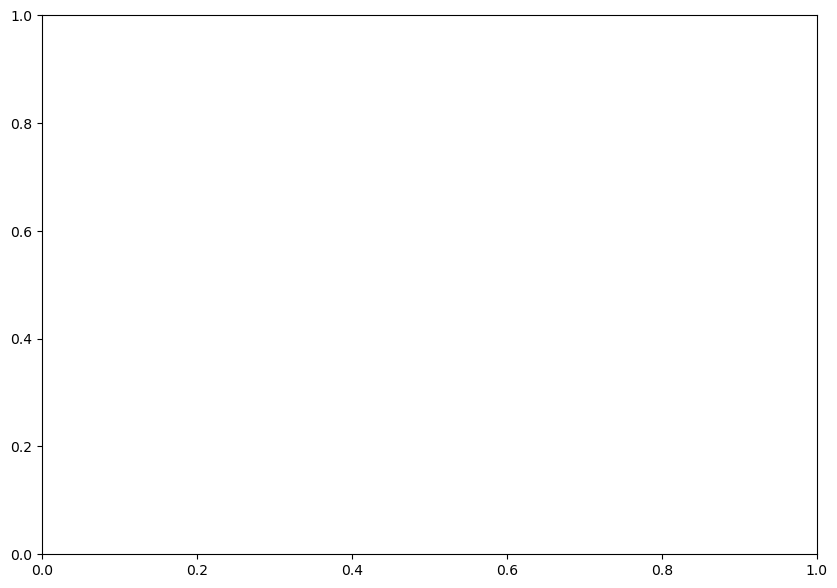

In [68]:
import matplotlib.pyplot as plt
import numpy as np

N = 5
width = 0.35 
ind = np.arange(N)   

fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind,less_than_hour,width)
p2 = plt.bar(ind,purched,width)

In [48]:
#I was interested if there are games played more than 10000 hours - it is more than 416 days!
steam[steam['value']>10000]

,user-id,game-title,behavior-name,value
112643,100630947,Dota 2,play,10442.0
123726,73017395,Sid Meier's Civilization V,play,11754.0


In [61]:
steam['behavior-name'].value_counts()

purchase    129511
play         70489
Name: behavior-name, dtype: int64

In [ ]:
#ideas: games that are played longest, games that are mostly purched and not played, games played less than hour mostly 